### Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from config import CFG
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns

### Load data

In [3]:
label_data = pd.read_csv(os.path.join(CFG.train_data_dir, '文件标签汇总数据.csv'))
train_csv_folder = os.path.join(CFG.train_data_dir, 'csv文件')
test_A_csv_folder = os.path.join(CFG.test_A_data_dir, 'csv文件')
train_image_folder = os.path.join(CFG.project_name, 'project/image/训练集数据')
test_A_image_folder = os.path.join(CFG.project_name, 'project/image/A榜测试集数据')

  0%|          | 0/115 [00:00<?, ?it/s]

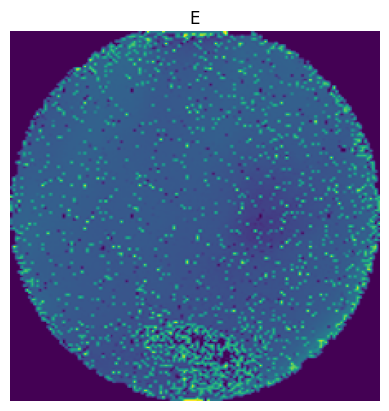

  1%|          | 1/115 [00:01<02:39,  1.40s/it]

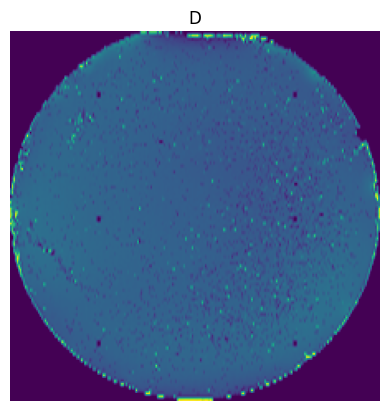

  2%|▏         | 2/115 [00:04<03:59,  2.12s/it]

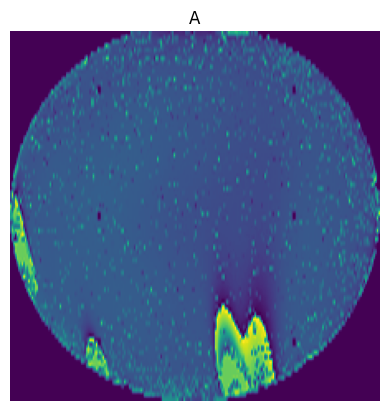

  3%|▎         | 3/115 [00:05<03:31,  1.89s/it]

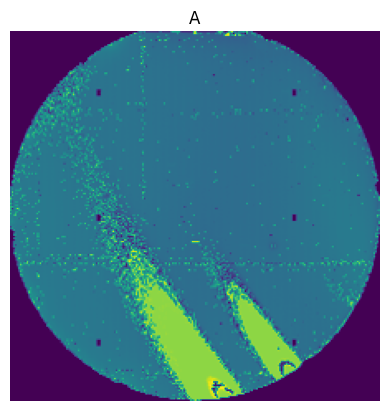

  3%|▎         | 4/115 [00:09<05:03,  2.74s/it]

In [24]:
# 读取csv文件，将数据转换为图片，csv有三列，分别为X,Y,Value,其中X,Y为坐标，Value为对应的值
if not os.path.exists(train_image_folder):
        os.makedirs(train_image_folder)
for csv_file in tqdm(os.listdir(train_csv_folder)):
        csv_path = os.path.join(train_csv_folder, csv_file)
        label = label_data[label_data['fileName']
                               == csv_file]['defectType'].values[0]
        data = pd.read_csv(csv_path)
        length_x = data['X'].max() - data['X'].min()
        length_y = data['Y'].max() - data['Y'].min()
        image_array = np.zeros((length_x + 1, length_y + 1))
        min_x = data['X'].min()
        min_y = data['Y'].min()
        value_mean = data['Value'].mean()
        value_std = data['Value'].std()
        for _, row in data.iterrows():
            x, y, value = int(
                row['X'] - min_x), int(row['Y'] - min_y), row['Value']
            image_array[x, y] = (value - value_mean) / value_std
        image = Image.fromarray(np.uint8(image_array * 255))
        image = image.resize((224, 224))
        # 用plt显示图片
        plt.imshow(image)
        plt.axis('off')
        plt.title(label)
        # 保存图片
        image.save(os.path.join(train_image_folder, 
                                csv_file.replace('csv', 'jpg') if 'csv' in csv_file else csv_file.replace('CSV', 'jpg')))
        

        
    


### 加载模型

In [ ]:
# 